<a href="https://colab.research.google.com/github/ROYXP/Neural-Network-Regression/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to regression with Neural Networks in Tensorflow

Regression is based on predicting a numerical variable based on other combination of variables

In [ ]:
# Import Tensorflow
import tensorflow as tf
print (tf.__version__)

2.15.0


## Creating some data to view and fit

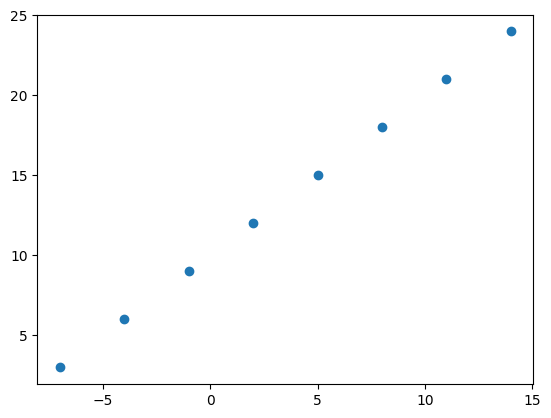

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create the features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create the labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

### Input and Ouput shapes

In [ ]:
# Create a demo tensor for our hosuing price prediction problem
house_info = tf.constant(["bedroom,", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom,', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [ ]:
# Turn our NumPy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

## Steps with modelling in tensorflow

1. `Creating a model` - define input and ouput layers, as well as the hidden layers of a deep learning model.
2. `Compiling a model` - define the loss function (It tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. `**Fitting the model**` - Letting the model find patterns between X & y (features and labels)

In [ ]:
# Set randon seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=1), y, epochs=5)


Epoch 1/5
1/1 [==============================] - 1s 698ms/step - loss: 19.8120 - mae: 19.8120
Epoch 2/5
1/1 [==============================] - 0s 14ms/step - loss: 19.5307 - mae: 19.5307
Epoch 3/5
1/1 [==============================] - 0s 13ms/step - loss: 19.2495 - mae: 19.2495
Epoch 4/5
1/1 [==============================] - 0s 12ms/step - loss: 18.9682 - mae: 18.9682
Epoch 5/5
1/1 [==============================] - 0s 15ms/step - loss: 18.6870 - mae: 18.6870


In [ ]:
# Check out X & y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Try making predictions using our trained model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 163ms/step


array([[-18.367306]], dtype=float32)

In [ ]:
y_pred + 9.9

array([[-8.467306]], dtype=float32)

## Improving our model

In [ ]:
# Rebuilding our model

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=1000)

Epoch 1/1000
1/1 [==============================] - 0s 489ms/step - loss: 10.5446 - mae: 10.5446
Epoch 2/1000
1/1 [==============================] - 0s 11ms/step - loss: 10.4121 - mae: 10.4121
Epoch 3/1000
1/1 [==============================] - 0s 11ms/step - loss: 10.2796 - mae: 10.2796
Epoch 4/1000
1/1 [==============================] - 0s 10ms/step - loss: 10.1471 - mae: 10.1471
Epoch 5/1000
1/1 [==============================] - 0s 10ms/step - loss: 10.0146 - mae: 10.0146
Epoch 6/1000
1/1 [==============================] - 0s 10ms/step - loss: 9.8821 - mae: 9.8821
Epoch 7/1000
1/1 [==============================] - 0s 10ms/step - loss: 9.7496 - mae: 9.7496
Epoch 8/1000
1/1 [==============================] - 0s 10ms/step - loss: 9.6171 - mae: 9.6171
Epoch 9/1000
1/1 [==============================] - 0s 10ms/step - loss: 9.4846 - mae: 9.4846
Epoch 10/1000
1/1 [==============================] - 0s 10ms/step - loss: 9.3521 - mae: 9.3521
Epoch 11/1000
1/1 [=============================

In [ ]:
# Check the data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 182ms/step


array([[28.332165]], dtype=float32)

In [ ]:
# Rebuilding our model

# 1. Creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 695ms/step - loss: 14.5627 - mae: 14.5627
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 14.3698 - mae: 14.3698
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 14.1821 - mae: 14.1821
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 13.9986 - mae: 13.9986
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 13.8184 - mae: 13.8184
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 13.6405 - mae: 13.6405
Epoch 7/100
1/1 [==============================] - 0s 16ms/step - loss: 13.4640 - mae: 13.4640
Epoch 8/100
1/1 [==============================] - 0s 14ms/step - loss: 13.2881 - mae: 13.2881
Epoch 9/100
1/1 [==============================] - 0s 16ms/step - loss: 13.1119 - mae: 13.1119
Epoch 10/100
1/1 [==============================] - 0s 13ms/step - loss: 12.9346 - mae: 12.9346
Epoch 11/100
1/1 [==============================

In [ ]:
# Making changes to improve our model
# Craete the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 875ms/step - loss: 12.5907 - mae: 12.5907
Epoch 2/100
1/1 [==============================] - 0s 21ms/step - loss: 11.9919 - mae: 11.9919
Epoch 3/100
1/1 [==============================] - 0s 17ms/step - loss: 11.3817 - mae: 11.3817
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 10.7544 - mae: 10.7544
Epoch 5/100
1/1 [==============================] - 0s 16ms/step - loss: 10.1062 - mae: 10.1062
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 9.4376 - mae: 9.4376
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 8.7296 - mae: 8.7296
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 7.9868 - mae: 7.9868
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 7.1987 - mae: 7.1987
Epoch 10/100
1/1 [==============================] - 0s 13ms/step - loss: 6.3563 - mae: 6.3563
Epoch 11/100
1/1 [==============================] - 0s 12m

In [ ]:
model.predict([17.0])

1/1 [==============================] - 0s 113ms/step


array([[32.965763]], dtype=float32)

In [ ]:
# Making a larger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Make lebels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

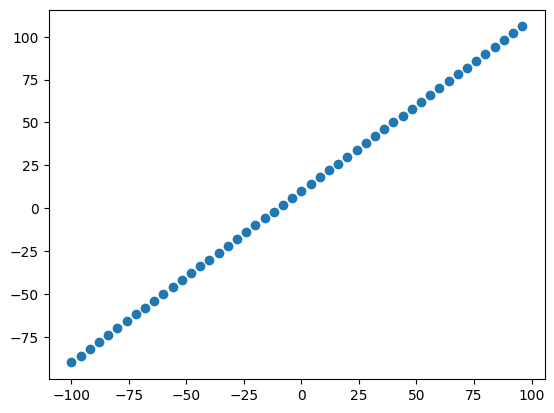

In [ ]:
# Visualise the data
import matplotlib.pyplot as plt
plt.scatter(X, y)


In [ ]:
len(X)

50

In [ ]:
# split the data into training and test sets
X_train = X[:40]
X_test = X[40:]

y_train = y[:40]
y_test = y[40:]

len(X_train), len(X_test), len(X_test), len(y_test)

(40, 10, 10, 10)

### Visualising the data

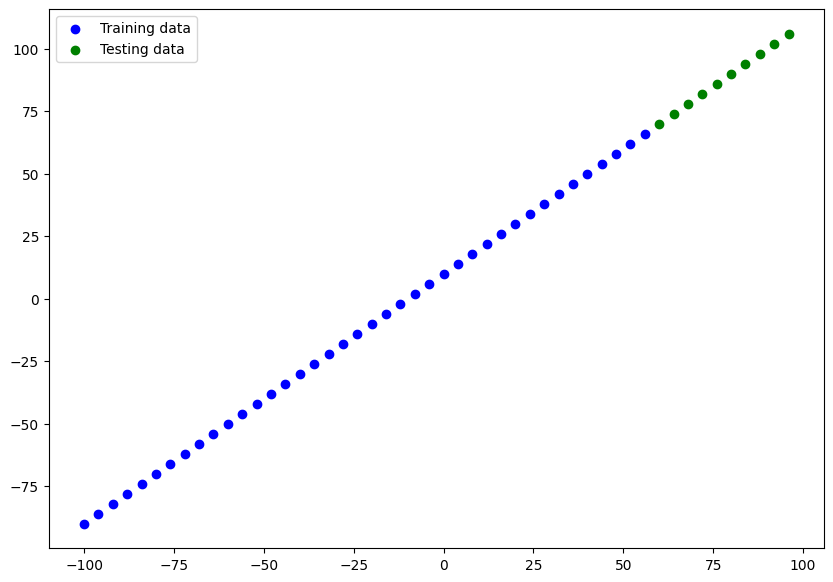

In [ ]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
# Plot test data in green
plt.scatter(X_test, y_test, c='g', label="Testing data")
# Show a legend
plt.legend();


In [ ]:
# Building a neural network for our data

#1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# # 3. Fit the model
# model.fit(X_train, y_train, epochs=100)

## Visualizing the model

In [ ]:
# model.summary()

In [ ]:
# Creating a model which builds automatically by defining the input shappe arguements
tf.random.set_seed(42)

# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_1......")

# Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [ ]:
model.summary()

Model: "model_1......"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Fit the model
model.fit(X_train, y_train, epochs=100, verbose=0)

In [ ]:
model.summary()

Model: "model_1......"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


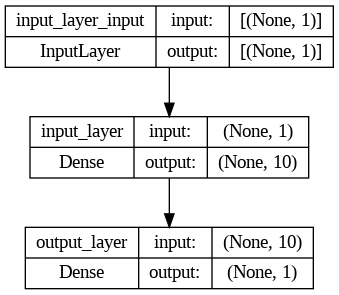

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

### Visualizing our models predictions


In [ ]:
# Make some predictions to create y_preds

y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 102ms/step


array([[ 76.13178 ],
       [ 81.088394],
       [ 86.04502 ],
       [ 91.001625],
       [ 95.958244],
       [100.91486 ],
       [105.87147 ],
       [110.82809 ],
       [115.7847  ],
       [120.74131 ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
# Creating a plotting function

def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions to ground truth labels
  """

  plt.figure(figsize=(10, 7))
  plt.scatter(train_data, train_labels, c="b", label="Training_data")
  plt.scatter(test_data, test_labels, c="g", label="Testing_data")
  # Plot model's predictions in red
  plt.scatter(test_data, predictions, c="y", label="model's predictions")
  plt.legend();

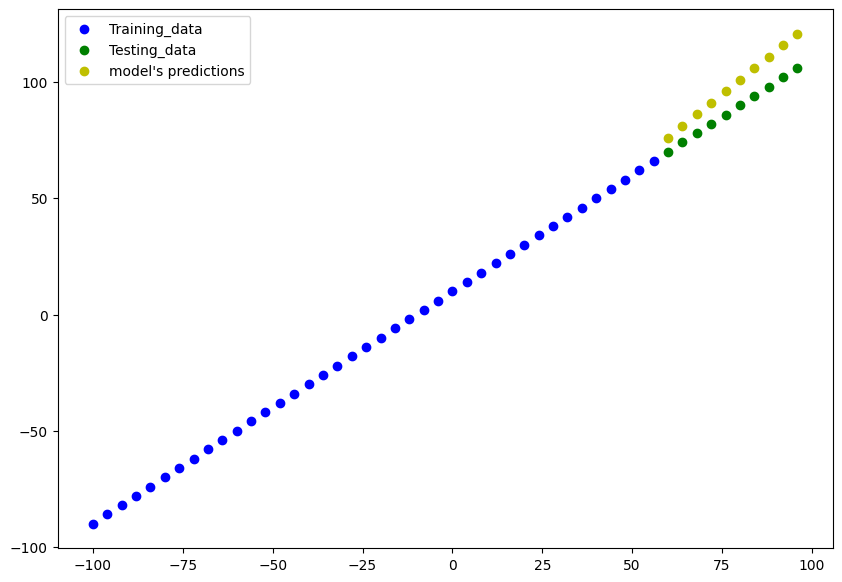

In [ ]:
plot_predictions()

In [ ]:
# Evaluate the model on the test set

model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 237ms/step - loss: 10.4366 - mae: 10.4366


[10.436552047729492, 10.436552047729492]

In [ ]:
# Creating a model which builds automatically by defining the input shappe arguements
tf.random.set_seed(42)

# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_1......")

# Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [ ]:
# Calculate the mean absolute error

mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                           y_pred=tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([13.52093 , 11.164642, 10.      , 10.200325, 11.583298, 14.148918,
       17.897175, 22.828087, 27.784698, 32.74131 ], dtype=float32)>

In [ ]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 76.13178 ],
       [ 81.088394],
       [ 86.04502 ],
       [ 91.001625],
       [ 95.958244],
       [100.91486 ],
       [105.87147 ],
       [110.82809 ],
       [115.7847  ],
       [120.74131 ]], dtype=float32)>

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 76.13178 ,  81.088394,  86.04502 ,  91.001625,  95.958244,
       100.91486 , 105.87147 , 110.82809 , 115.7847  , 120.74131 ],
      dtype=float32)>

In [ ]:
# Calculate the mean absolute error

mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                           y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=10.436549>

In [ ]:
# Calculate the mean squared error

mse = tf.metrics.mean_squared_error(y_true=y_test,
                                         y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=116.47123>

In [ ]:
# Calculate the huber (Combination of mse & mae)

huber = tf.keras.losses.huber(y_true=y_test,
                                y_pred=tf.squeeze(y_pred))
huber

<tf.Tensor: shape=(), dtype=float32, numpy=9.936549>

In [ ]:
# Make functions to reuse MAE & MSE

def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                        y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true,
                                         y_pred=tf.squeeze(y_pred))

### Running expriments to improve our model

Doing 3 modelling experiments;

1. `Model_1` - Same as the original model, 1 layer trained for 100 epochs
2. `Model_2` - 2 layers trained for 100 epochs
3. `Model_3` - 2 layers trained for 500 epochs

**Build model_1**

In [ ]:
X = tf.range(-100, 100, 4)
y = X + 10
X_train = X[:40]
X_test = X[40:]

y_train = y[:40]
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model_1.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=100)


Epoch 1/100
2/2 [==============================] - 1s 21ms/step - loss: 45.4481 - mae: 45.4481
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 14.8225 - mae: 14.8225
Epoch 3/100
2/2 [==============================] - 0s 10ms/step - loss: 13.9477 - mae: 13.9477
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 7.5599 - mae: 7.5599
Epoch 5/100
2/2 [==============================] - 0s 12ms/step - loss: 7.5726 - mae: 7.5726
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 9.0401 - mae: 9.0401
Epoch 7/100
2/2 [==============================] - 0s 11ms/step - loss: 9.4527 - mae: 9.4527
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 9.3126 - mae: 9.3126
Epoch 9/100
2/2 [==============================] - 0s 12ms/step - loss: 7.5272 - mae: 7.5272
Epoch 10/100
2/2 [==============================] - 0s 14ms/step - loss: 12.5686 - mae: 12.5686
Epoch 11/100
2/2 [==============================] - 0s 9ms/step -

1/1 [==============================] - 0s 116ms/step


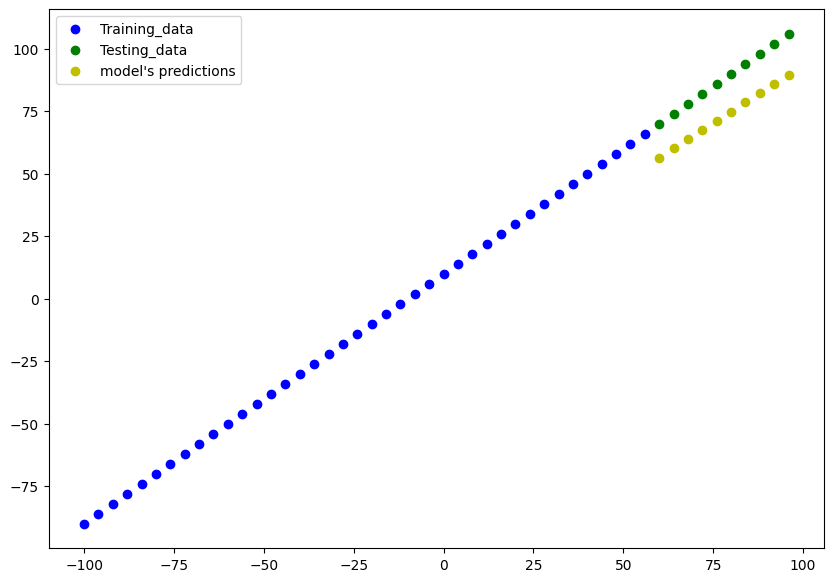

In [ ]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [ ]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=14.945028>,
 <tf.Tensor: shape=(), dtype=float32, numpy=224.196>)

**Build model_2**

2 dense layers trained for a 100 epochs

In [ ]:
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mse"])

# 3. Fit the model
model_2.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 13ms/step - loss: 27.1796 - mse: 1524.7917
Epoch 2/100
2/2 [==============================] - 0s 13ms/step - loss: 24.8310 - mse: 955.7873
Epoch 3/100
2/2 [==============================] - 0s 13ms/step - loss: 29.5838 - mse: 1295.7107
Epoch 4/100
2/2 [==============================] - 0s 10ms/step - loss: 15.3793 - mse: 364.9205
Epoch 5/100
2/2 [==============================] - 0s 12ms/step - loss: 22.1828 - mse: 719.9125
Epoch 6/100
2/2 [==============================] - 0s 9ms/step - loss: 11.7573 - mse: 160.3834
Epoch 7/100
2/2 [==============================] - 0s 9ms/step - loss: 12.8788 - mse: 226.7807
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 11.1729 - mse: 158.9951
Epoch 9/100
2/2 [==============================] - 0s 9ms/step - loss: 40.9241 - mse: 2645.6426
Epoch 10/100
2/2 [==============================] - 0s 11ms/step - loss: 28.2599 - mse: 1126.0891
Epoch 11/100
2/2 [=====================

1/1 [==============================] - 0s 91ms/step


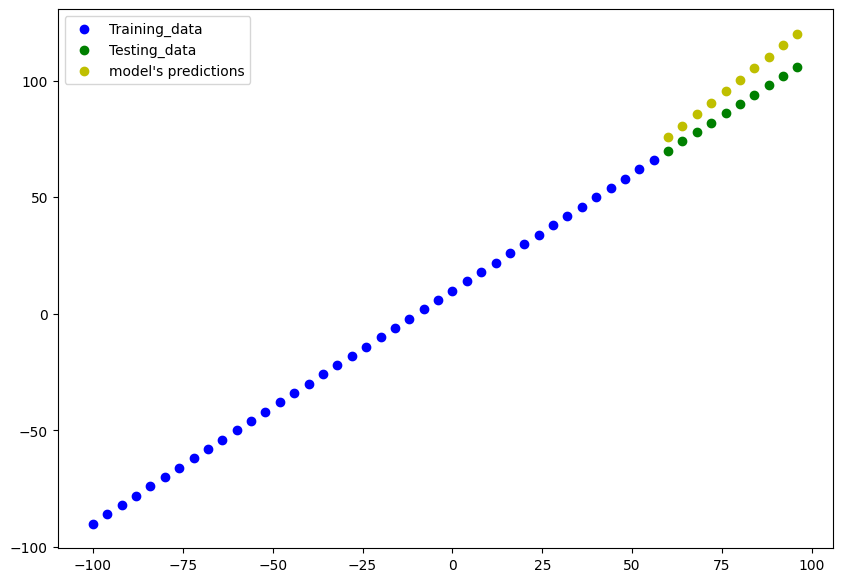

In [ ]:
# Make and plot predictions of model_2

y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [ ]:
# Calculate model_2 evaluation metrics

mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)

mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=9.879678>,
 <tf.Tensor: shape=(), dtype=float32, numpy=104.75952>)

In [ ]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

**Build model_3**

2 layers, trained for 500 epochs

In [ ]:
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 1s 18ms/step - loss: 52.4917 - mse: 4305.5127
Epoch 2/500
2/2 [==============================] - 0s 11ms/step - loss: 28.9209 - mse: 1095.1289
Epoch 3/500
2/2 [==============================] - 0s 8ms/step - loss: 33.9283 - mse: 1730.7037
Epoch 4/500
2/2 [==============================] - 0s 8ms/step - loss: 27.9003 - mse: 1143.8000
Epoch 5/500
2/2 [==============================] - 0s 12ms/step - loss: 15.1855 - mse: 292.7118
Epoch 6/500
2/2 [==============================] - 0s 12ms/step - loss: 12.0666 - mse: 177.6086
Epoch 7/500
2/2 [==============================] - 0s 10ms/step - loss: 11.3779 - mse: 157.0092
Epoch 8/500
2/2 [==============================] - 0s 8ms/step - loss: 11.1701 - mse: 169.7964
Epoch 9/500
2/2 [==============================] - 0s 10ms/step - loss: 41.4035 - mse: 2724.1294
Epoch 10/500
2/2 [==============================] - 0s 7ms/step - loss: 28.6780 - mse: 1161.3640
Epoch 11/500
2/2 [===================

1/1 [==============================] - 0s 157ms/step


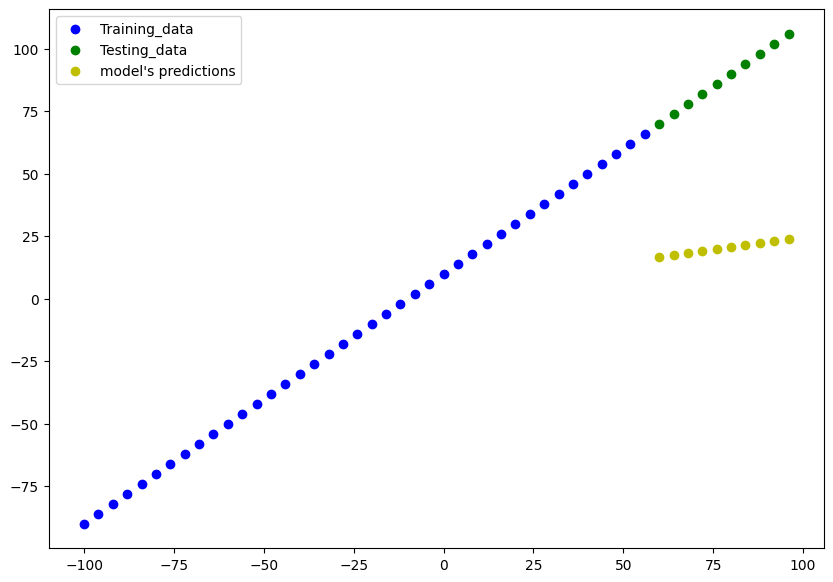

In [ ]:
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [ ]:
# Calculate model_3 evaluation metrics
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)

mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=67.59779>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4653.4736>)

## Comparing the results of our experiments

In [ ]:
# Comparing the model's result using a pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,14.945028,224.195999
1,model_2,9.879678,104.759521
2,model_3,67.597794,4653.473633


## Tracking your experiments

* Tensorboard - a component of Tensorflow library to help track modelling experiments
* Weights & Biases - a tool for tracking all kinds of machine learning experiments

# Savng our models

There are two formats for saving tensorflow models

1. The SavedModel format
2. The HDF5 format

In [ ]:
# Save the model using the SavedModel format

model_2.save("best_model_SavedModel_format")

In [ ]:
# Save the model using the HDF5 format

model_2.save("best_model_HDF5_format.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Load in the SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model("best_model_SavedModel_format")
loaded_SavedModel_format.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                20        
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Comparing model_2 predictions with SavedFormat model predictions
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format(X_test)
model_2_preds == loaded_SavedModel_format_preds

1/1 [==============================] - 0s 49ms/step


<tf.Tensor: shape=(10, 1), dtype=bool, numpy=
array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])>

In [ ]:
# Load in a model using the .h5 format
loaded_h5_model = tf.keras.models.load_model("best_model_HDF5_format.h5")
loaded_h5_model.summary() == model_2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                20        
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                20        
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                              

True

In [ ]:
# Make predictions with both model_2 and .h5 loaded model

model_2_preds = model_2.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)

model_2_preds == loaded_h5_model_preds

1/1 [==============================] - 0s 110ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Downloading a model (or any other file) from google colab

1. Go to `files` tab and select download
2. Using code
3. Saving to google drive by connecting google drive and coonecting it.

In [ ]:
# # Download a file from Google Colab
# from google.colab import files
# files.download("/content/best_model_HDF5_format.h5")

In [ ]:
# Save a file from Colab to drive

# !cp /content/best_model_HDF5_format.h5 /content/drive/MyDrive

# Working with a larger example

In [ ]:
# Import the required libraries

import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# Read in the insurance dataset

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
# One-Hot encoding the DataFrame so its all in numbers

insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:

# Create training & test sets

X = insurance_one_hot.drop('charges', axis=1)
y = insurance_one_hot["charges"]

from sklearn.model_selection import train_test_split

# Split the data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test), len(y_train), len(y_test)

(1338, 1070, 268, 1070, 268)

In [ ]:
# Create a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# Fit the model
history = model_1.fit(X_train, y_train, epochs=200, verbose=0)

In [ ]:
model_1.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3503.8950 - mae: 3503.8950


[3503.89501953125, 3503.89501953125]

Text(0.5, 0, 'epochs')

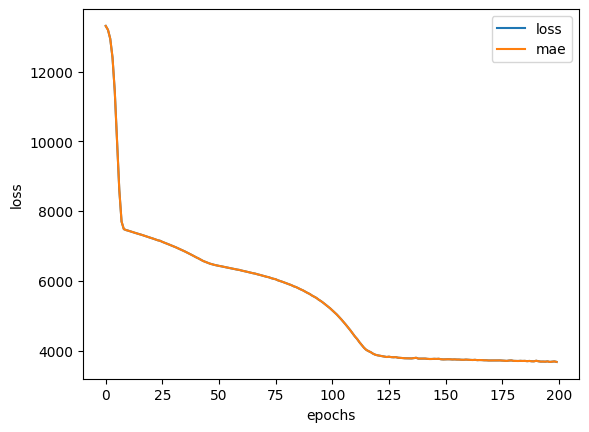

In [ ]:
# Plot history (`also known as the loss curve or training curve`)

pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

# Preprocessing data (Normalization & Standardization)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance DataFrame
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# import classes from scikit-learn
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),
    (OneHotEncoder(handle_unknown="ignore"),["sex", "smoker", "region"])
)

# Create x and y
x = insurance.drop('charges', axis=1)
y = insurance["charges"]

# Split into train & test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Fit the training set to the transformer
ct.fit(x_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
x_train_normal = ct.transform(x_train)
x_test_normal = ct.transform(x_test)

In [ ]:
x_train_normal

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
x_train.shape, x_train_normal.shape

((1070, 6), (1070, 11))

In [ ]:
# Building a neural network model to fit normalized data
tf.random.set_seed(42)

#1. Create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2. Compile a model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])

#3. Fit the model
history = insurance_model.fit(x_train_normal, y_train, epochs=200, verbose=0)

In [ ]:
# Evaluate our model trained on normalised data
insurance_model.evaluate(x_test_normal, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3167.9038 - mae: 3167.9038


[3167.90380859375, 3167.90380859375]

Text(0.5, 0, 'epochs')

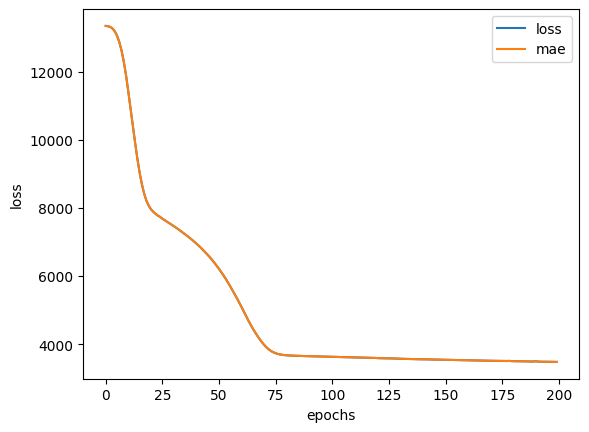

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

# Improving the model

Building a model with 4 dense layers

In [ ]:
# Create the model

insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(300),
    tf.keras.layers.Dense(200),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10)
])

# Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(lr=0.01),
                          metrics=["mae"])

# Fit the model
history = insurance_model_2.fit(x_train_normal, y_train, epochs=300)

Epoch 1/300
34/34 [==============================] - 2s 8ms/step - loss: 13315.9844 - mae: 13315.9844
Epoch 2/300
34/34 [==============================] - 0s 9ms/step - loss: 12303.4707 - mae: 12303.4707
Epoch 3/300
34/34 [==============================] - 0s 6ms/step - loss: 8500.2666 - mae: 8500.2666
Epoch 4/300
34/34 [==============================] - 0s 3ms/step - loss: 7726.4468 - mae: 7726.4468
Epoch 5/300
34/34 [==============================] - 0s 3ms/step - loss: 7303.6626 - mae: 7303.6626
Epoch 6/300
34/34 [==============================] - 0s 4ms/step - loss: 6797.6665 - mae: 6797.6665
Epoch 7/300
34/34 [==============================] - 0s 4ms/step - loss: 6001.6504 - mae: 6001.6504
Epoch 8/300
34/34 [==============================] - 0s 4ms/step - loss: 4795.7573 - mae: 4795.7573
Epoch 9/300
34/34 [==============================] - 0s 4ms/step - loss: 3811.4902 - mae: 3811.4902
Epoch 10/300
34/34 [==============================] - 0s 4ms/step - loss: 3666.7476 - mae: 3666.

In [ ]:
insurance_model_2.evaluate(x_test_normal, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 3167.4402 - mae: 3167.4402


[3167.440185546875, 3167.440185546875]

Text(0.5, 0, 'epochs')

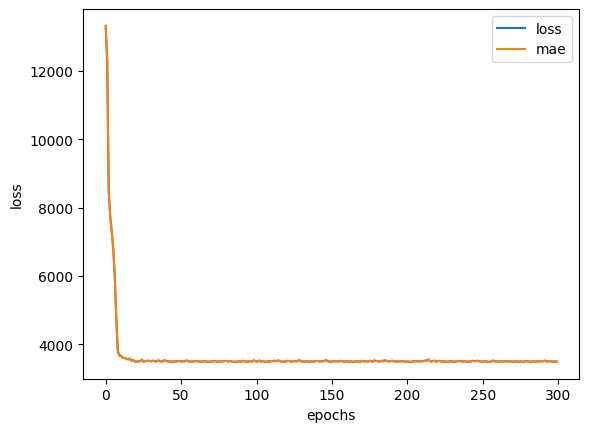

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")